# Import modules 

In [64]:
# Standard
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.linear_model import LinearRegression

In [8]:
# Set plotstyle
plt.style.use('seaborn')

# Data import and preprocessing
In order to import the data, we use pandas `read_csv` function. To get a sneak peak of the dataframe, we just call the `head()` method. 

In [9]:
df=pd.read_csv('data/mp_data_desc.csv')
df.head()

,Unnamed: 0,compound,CSID,MP_Kelvin,SMILES,rdk_smiles,BalabanJ,BertzCT,Chi0,Chi0n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,0,(-)-levonorgestrel,12560.0,509.15,O=C4\C=C3/[C@@H]([C@H]2CC[C@]1([C@@H](CC[C@]1(...,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,1.671196,597.453052,16.242276,14.183525,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746050
1,1,"(1E,4E)-1,5-Di(2-naphthyl)-1,4-pentadien-3-one",4523376.0,516.65,O=C(\C=C\c2ccc1c(cccc1)c2)\C=C\c2ccc1c(cccc1)c2,O=C(/C=C/c1ccc2ccccc2c1)/C=C/c1ccc2ccccc2c1,1.489886,1057.599472,17.769374,14.300553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400873
2,2,(2E)-1-(2-Hydroxyphenyl)-3-phenyl-2-propen-1-one,553827.0,360.90,OC1=C(C=CC=C1)C(\C=C\C2=CC=CC=C2)=O,O=C(/C=C/c1ccccc1)c1ccccc1O,2.181267,541.858095,12.087576,9.206315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641274
3,3,(2E)-1-(3-Hydroxyphenyl)-3-(2-nitrophenyl)-2-p...,7730515.0,461.15,OC1=CC=CC(=C1)C(\C=C\C2=C(C=CC=C2)[N+](=O)[O-])=O,O=C(/C=C/c1ccccc1[N+](=O)[O-])c1cccc(O)c1,2.258880,691.777798,14.535169,10.392675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399765
4,4,(2E)-1-(4-Hydroxyphenyl)-3-(4-methoxyphenyl)-2...,4511547.0,463.15,OC1=CC=C(C=C1)C(\C=C\C2=CC=C(C=C2)OC)=O,COc1ccc(/C=C/C(=O)c2ccc(O)cc2)cc1,2.084842,580.396040,13.664926,10.537213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.672316


As there are some columns that we do not need for further research, we use the `drop()` method in order to get rid of them. Remebmer to set `axis=1` to drop actual columns, as the default `axis=0` drops rows. 

In [10]:
dataset_clean = df.drop(['Unnamed: 0', 'compound', 'CSID', 'SMILES', 'rdk_smiles'], axis=1)

In [5]:
dataset_clean.head()

,MP_Kelvin,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,509.15,1.671196,597.453052,16.242276,14.183525,14.183525,11.043772,9.478974,9.478974,8.395266,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746050
1,516.65,1.489886,1057.599472,17.769374,14.300553,14.300553,12.775990,8.656260,8.656260,6.282212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400873
2,360.90,2.181267,541.858095,12.087576,9.206315,9.206315,8.270857,5.326448,5.326448,3.625417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641274
3,461.15,2.258880,691.777798,14.535169,10.392675,10.392675,9.575387,5.825887,5.825887,4.063838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399765
4,463.15,2.084842,580.396040,13.664926,10.537213,10.537213,9.185872,5.843521,5.843521,4.017618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.672316


In [69]:
feature_names = dataset_clean.drop('MP_Kelvin', axis=1).columns

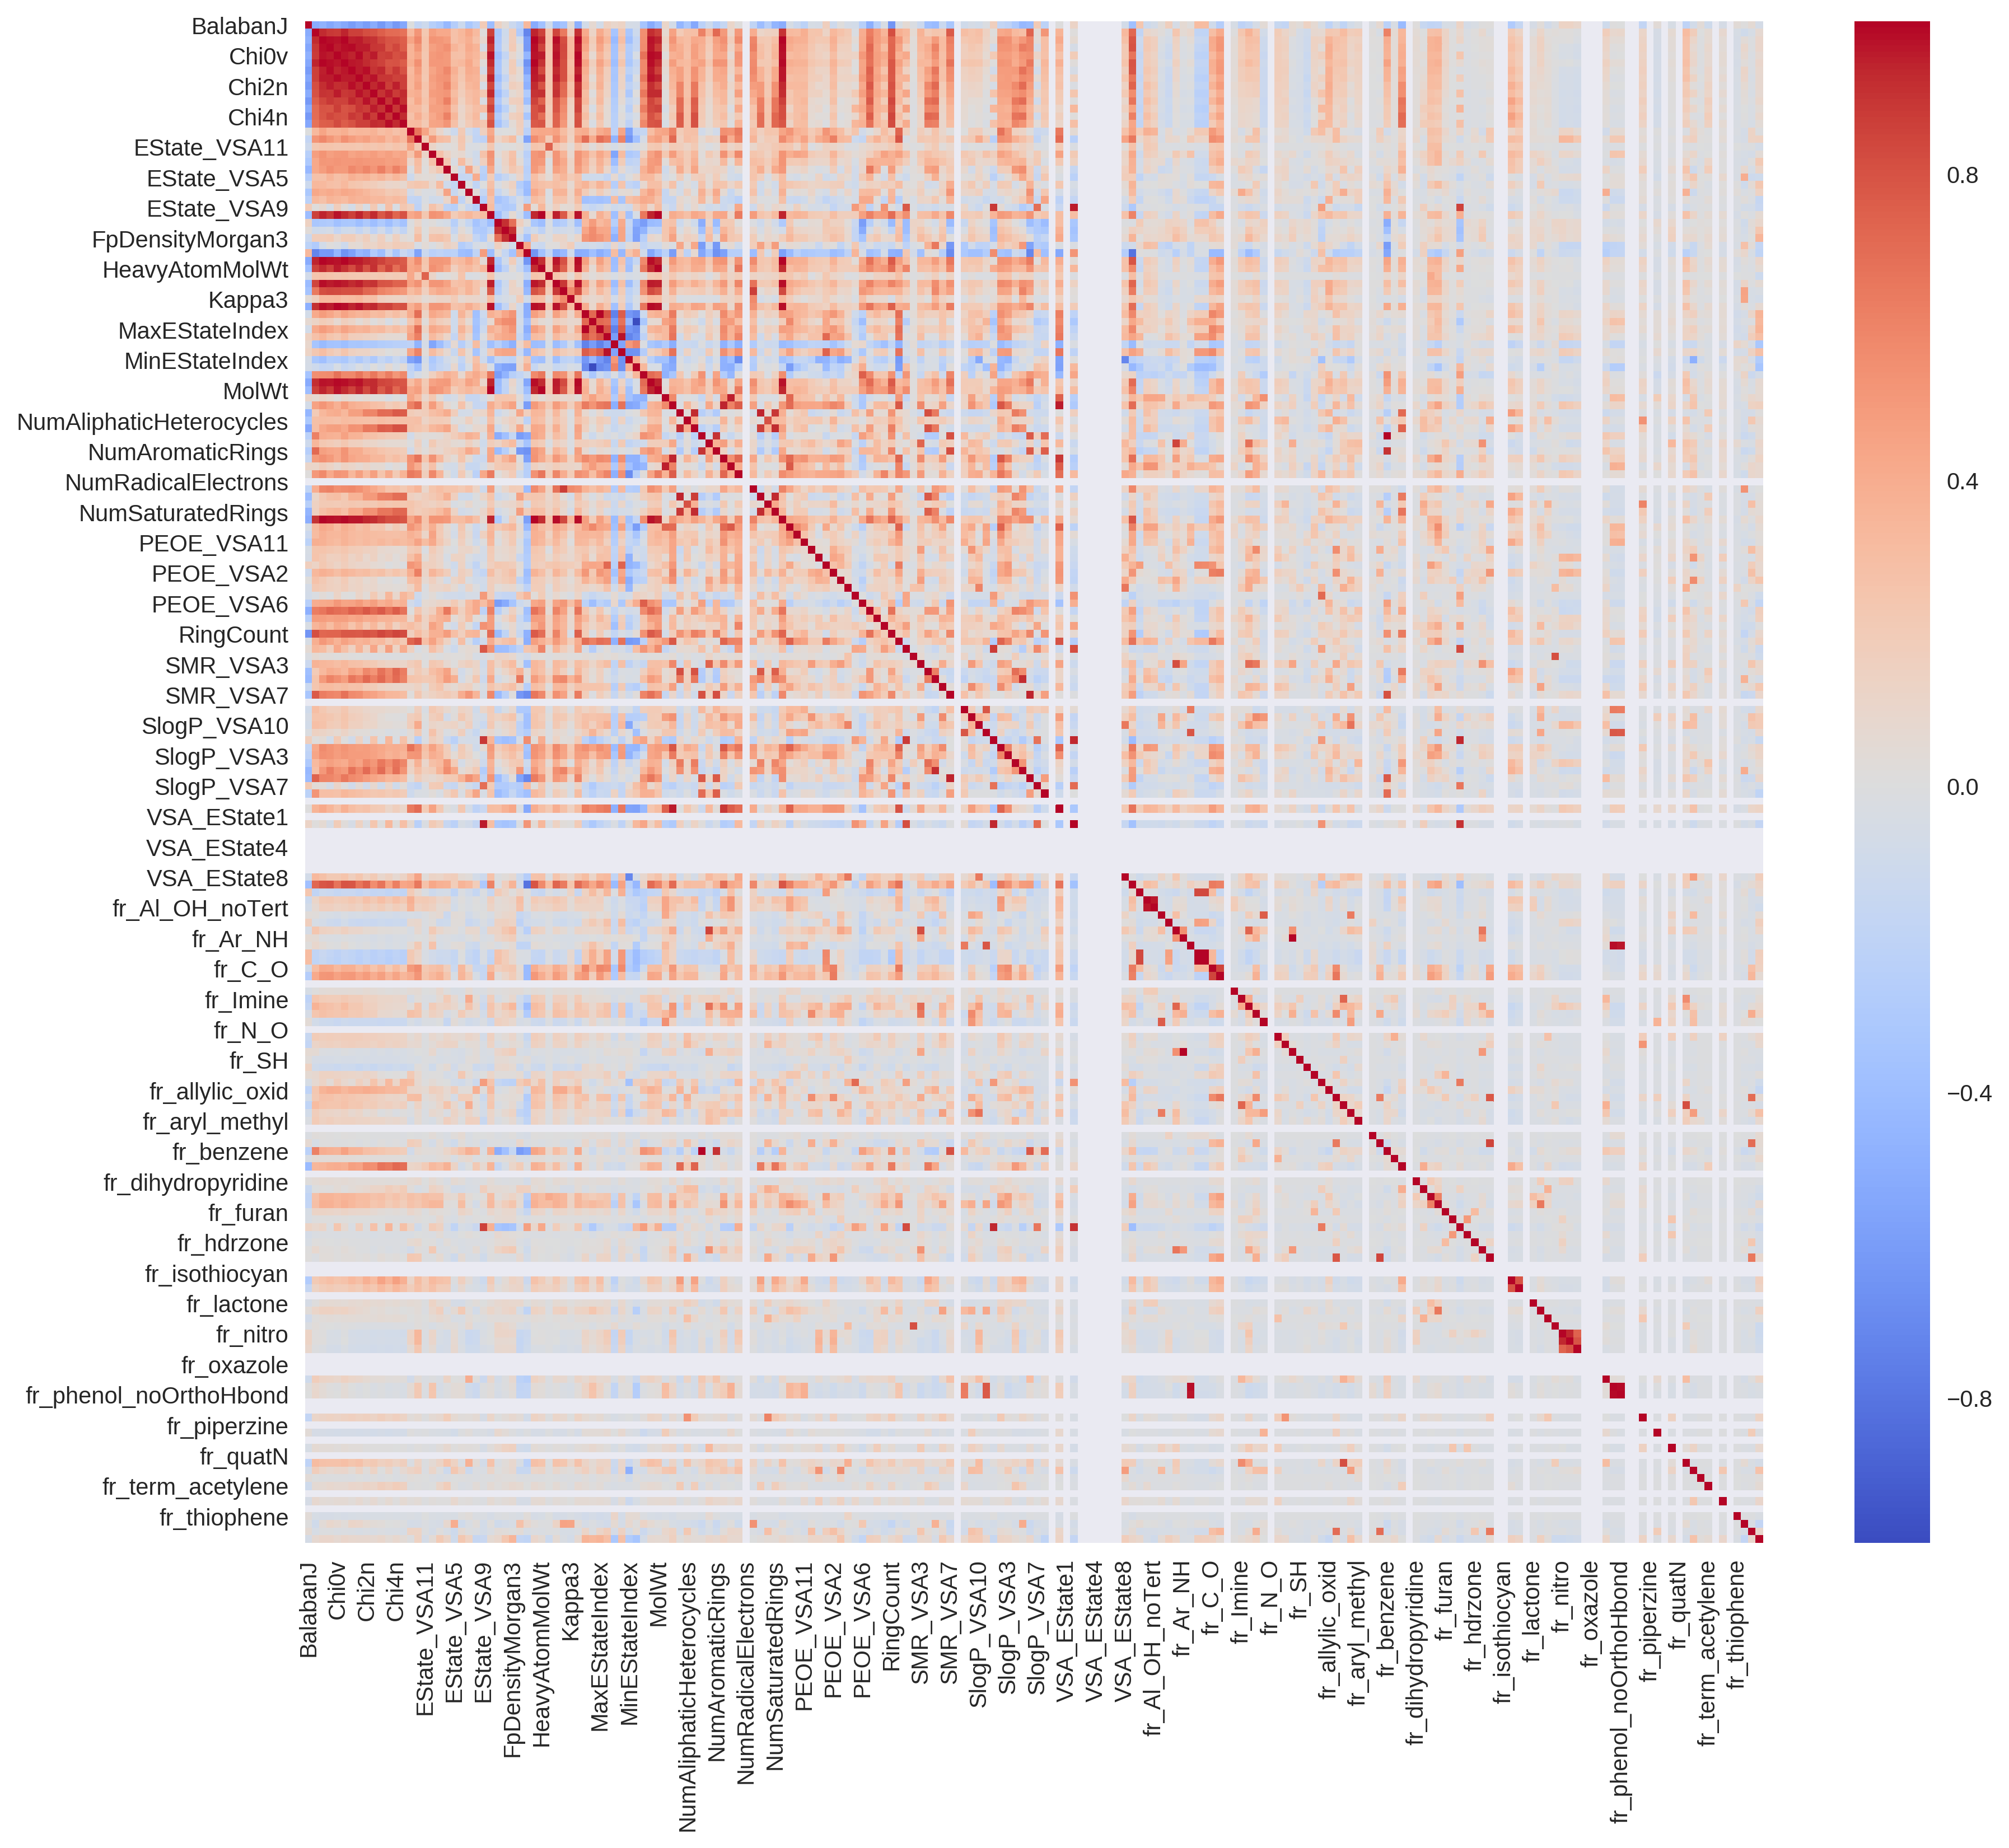

In [6]:
fig, ax = plt.subplots(figsize=(14,12), dpi=300)
sns.heatmap(dataset_clean.drop('MP_Kelvin', axis=1).corr(), cmap='coolwarm')

In [12]:
dataset_clean.shape

(597, 201)

In [20]:
dataset_clean[['MP_Kelvin']]

,MP_Kelvin
0,509.15
1,516.65
2,360.90
3,461.15
4,463.15
5,368.15
6,330.15
7,485.65
8,360.15
9,402.15


In [14]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(dataset_clean.drop('MP_Kelvin', axis=1), dataset_clean[['MP_Kelvin']], test_size=0.33, random_state=42)

In [35]:
X_train

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
149,3.158902,253.434546,7.560478,5.664863,5.664863,4.736382,2.986018,2.986018,2.163775,2.163775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.594001
124,3.179030,230.655221,7.560478,6.217649,6.217649,4.719545,3.256428,3.256428,2.538898,2.538898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537484
425,2.232824,589.563781,13.828063,11.473304,11.473304,9.096555,6.309637,6.309637,4.676152,4.676152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.787103
462,1.659907,1177.919929,21.250348,16.994589,17.811085,14.452397,9.581419,10.397915,6.997588,8.006687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.558237
185,2.760252,103.587975,9.464102,5.731888,10.267462,5.464102,3.309307,5.927922,2.666558,5.690274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597604
310,2.575667,623.628576,13.284093,9.022706,9.022706,8.486071,5.005370,5.005370,3.661249,3.661249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.860782
300,1.646027,606.205115,17.112520,15.014423,15.014423,11.397849,9.773954,9.773954,9.267728,9.267728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.839803
584,1.347890,1648.759333,28.603719,24.415148,24.415148,19.030696,14.037194,14.037194,12.066666,12.066666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216776
517,1.760537,764.363126,18.905413,15.325914,15.325914,12.170505,9.507196,9.507196,9.015460,9.015460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.784833
248,2.831257,49.509775,4.991564,3.769675,3.769675,2.770056,1.988391,1.988391,1.143739,1.143739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543441


# Without feature selection

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# The coefficients
#print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))

# Plot outputs
#plt.scatter(X_test, y_test)
#lt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Mean squared error: 7472925141.48
Variance score: -650206.59


# With feature selection

In [61]:
from sklearn.feature_selection import mutual_info_regression

In [67]:
mreg = mutual_info_regression(X_train, y_train)

/home/gcuder/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
fs_results = pd.DataFrame({'feature':feature_names, 'mi':mreg})

,feature,mi
0,BalabanJ,0.119095
1,BertzCT,0.357081
2,Chi0,0.368925
3,Chi0n,0.269833
4,Chi0v,0.330689
5,Chi1,0.376204
6,Chi1n,0.274292
7,Chi1v,0.281952
8,Chi2n,0.229672
9,Chi2v,0.267089


# fuzija sirovih podataka i deskriptora

In [6]:
final_data=pd.concat([sirovi_podaci, mol_column, logp, molwt, balabanj, tpsa], axis=1)
final_data.head(4)

,cas,smiles,logs,mol,logp,molwt,balabanj,tpsa
0,60-35-5,CC(N)=O,1.58,<rdkit.Chem.rdchem.Mol object at 0x000001FE869...,-0.5084,59.068,2.803039,43.09
1,60-34-4,CNN,1.34,<rdkit.Chem.rdchem.Mol object at 0x000001FE869...,-0.9205,46.073,1.632993,38.05
2,64-19-7,CC(O)=O,1.22,<rdkit.Chem.rdchem.Mol object at 0x000001FE869...,0.0909,60.052,2.803039,37.30
3,123-75-1,C1CCCN1,1.15,<rdkit.Chem.rdchem.Mol object at 0x000001FE869...,0.3698,71.123,2.083333,12.03


#final_data.to_csv('data/solubility_all_data.csv')

# razdvajanje podataka na trening i test set

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(final_data, test_size=.2, random_state=42)
train_set.shape, test_set.shape

((1048, 8), (263, 8))

# vizualizacija odnosa varijabli

In [8]:
train_set[['logp','molwt','tpsa','balabanj','logs']].corr()

,logp,molwt,tpsa,balabanj,logs
logp,1.000000,0.451401,-0.513134,-0.162983,-0.840738
molwt,0.451401,1.000000,0.412144,-0.359005,-0.639202
tpsa,-0.513134,0.412144,1.000000,-0.069396,0.185571
balabanj,-0.162983,-0.359005,-0.069396,1.000000,0.232376
logs,-0.840738,-0.639202,0.185571,0.232376,1.000000


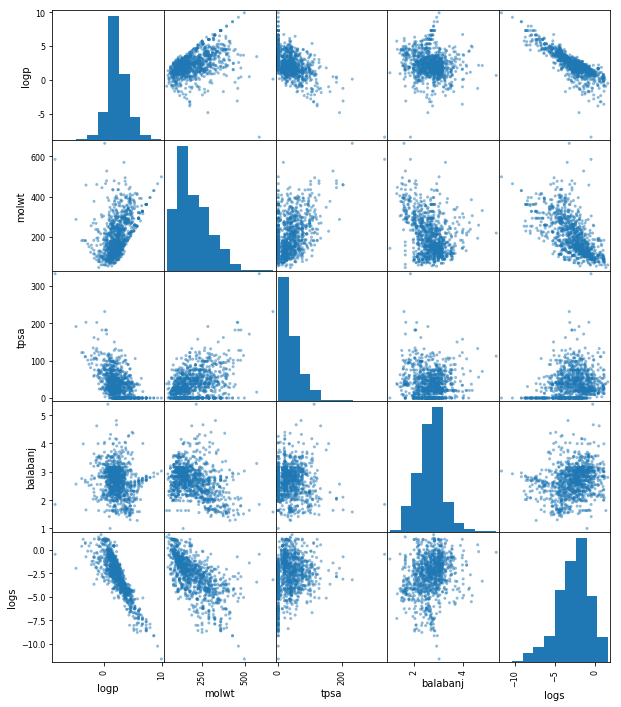

In [9]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(train_set[['logp','molwt','tpsa','balabanj','logs']], figsize=(10,12));

# izbor najbolje varijable

In [10]:
from sklearn.feature_selection import f_regression

In [11]:
help(f_regression)

Help on function f_regression in module sklearn.feature_selection.univariate_selection:

f_regression(X, y, center=True)
    Univariate linear regression tests.
    
    Linear model for testing the individual effect of each of many regressors.
    This is a scoring function to be used in a feature seletion procedure, not
    a free standing feature selection procedure.
    
    This is done in 2 steps:
    
    1. The correlation between each regressor and the target is computed,
       that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) *
       std(y)).
    2. It is converted to an F score then to a p-value.
    
    For more on usage see the :ref:`User Guide <univariate_feature_selection>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}  shape = (n_samples, n_features)
        The set of regressors that will be tested sequentially.
    
    y : array of shape(n_samples).
        The data matrix
    
    center : True, bool,
        If true, X

In [12]:
featsel=f_regression(X=train_set[['logp','molwt','tpsa','balabanj']], y=train_set['logs'])
F_values=featsel[0]
P_values=featsel[1]
P_values

array([  5.79397574e-281,   1.94076230e-121,   1.42230093e-009,
         2.57225427e-014])

# treniranje modela

In [13]:
from sklearn.linear_model import LinearRegression as linreg

In [14]:
xtrain=np.array(train_set.logp)[:, np.newaxis]
ytrain=np.array(train_set.logs)
xtest=np.array(test_set.logp)[:, np.newaxis]
y_true=np.array(test_set.logs)

In [15]:
fitter=linreg().fit(X=xtrain, y=ytrain)
a=fitter.coef_
b=fitter.intercept_
a, b

(array([-0.95544944]), -0.55785964516979547)

# fitanje modela i predikcija

In [16]:
y_pred=fitter.predict(X=xtest)

# vizualizacija predikcije

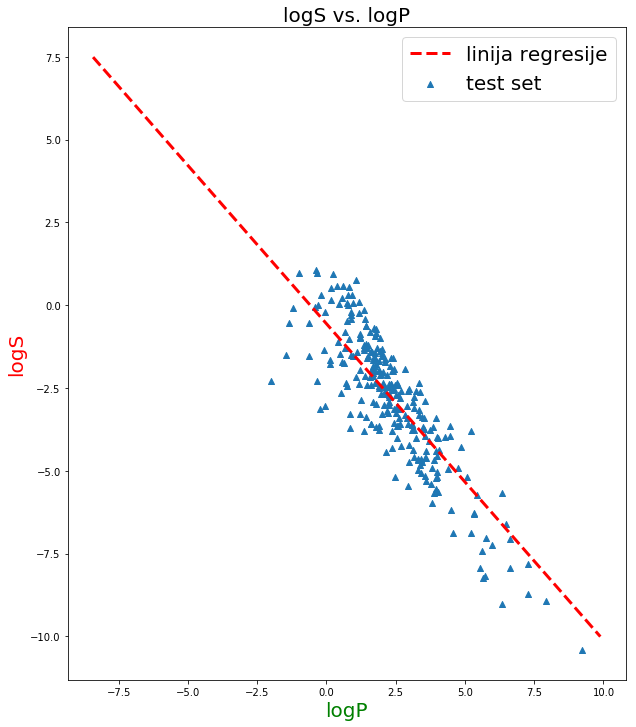

In [17]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(10,12))
#scatter plot
plt.scatter(x=test_set.logp, y=test_set.logs, marker='^', label='test set')
#regresijska linija
x_space=np.array([min(train_set.logp),max(train_set.logp)])
y_fit=x_space*a + b
plt.plot(x_space,y_fit, linestyle='--', c='r', lw=3, label="linija regresije")
#
plt.ylabel('logS', fontsize=20, color='red')
plt.xlabel('logP', fontsize=20, color='green')
plt.title('logS vs. logP', fontsize=20)
plt.legend(fontsize=20)

# kvaliteta predikcije

('MSE:', 1.071405731558055)

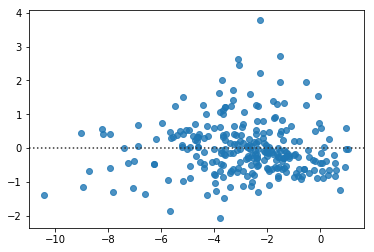

In [38]:
import seaborn as sns
sns.residplot(y_true,y_pred)
from sklearn.metrics import mean_squared_error as MSE
'MSE:',MSE(y_true, y_pred)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE8AD00FD0>]], dtype=object)

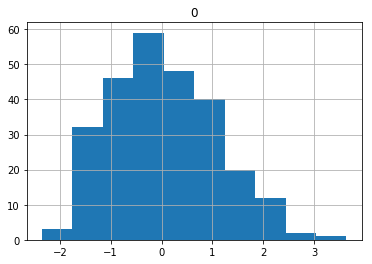

In [19]:
pd.DataFrame((y_pred-y_true)).hist()

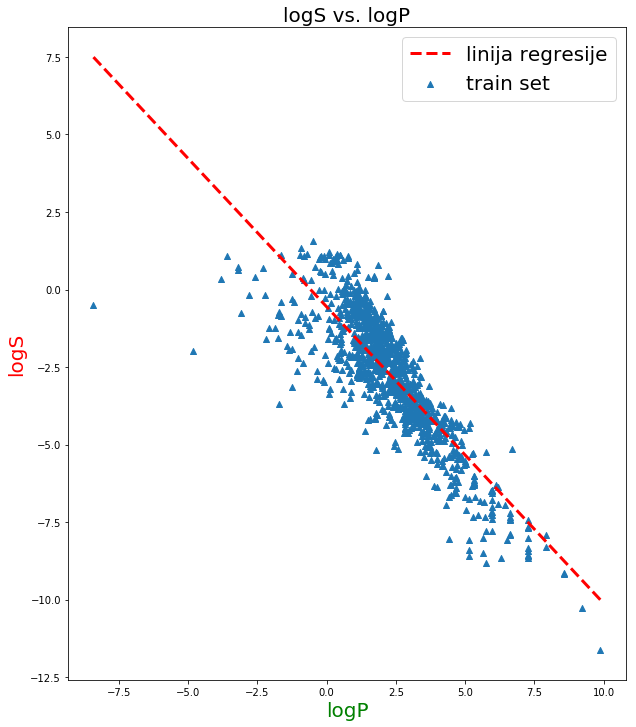

In [20]:
fig, ax =plt.subplots(figsize=(10,12))
#scatter plot
plt.scatter(x=train_set.logp, y=train_set.logs, marker='^', label='train set')
#regresijska linija
x_space=np.array([min(train_set.logp),max(train_set.logp)])
y_fit=x_space*fitter.coef_ + fitter.intercept_
ax.plot(x_space,y_fit, linestyle='--', c='r', lw=3, label="linija regresije")
#
ax.set_ylabel('logS', fontsize=20, color='red')
ax.set_xlabel('logP', fontsize=20, color='green')
ax.set_title('logS vs. logP', fontsize=20)
plt.legend(fontsize=20)

In [21]:
train_set[['logs','logp']].describe()

,logs,logp
count,1048.000000,1048.000000
mean,-2.714027,2.256705
std,2.031271,1.787395
min,-11.620000,-8.424200
25%,-3.960000,1.266550
50%,-2.435000,2.088900
75%,-1.320000,3.174225
max,1.580000,9.887600


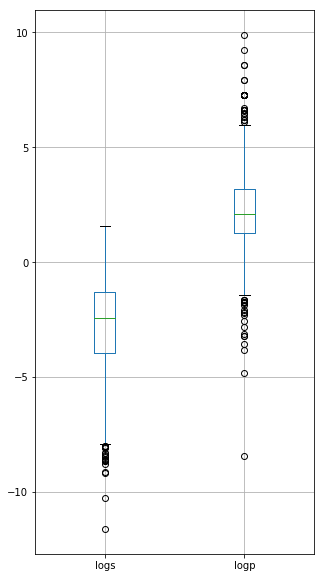

In [22]:
train_set[['logs','logp']].plot.box(figsize=(5,10), grid=True)

C:\Users\mlovric\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


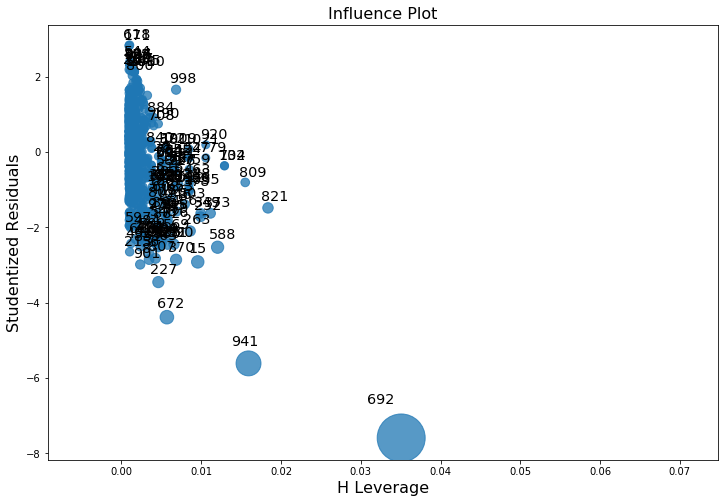

In [23]:
import statsmodels.api as sm
x_sm=sm.add_constant(xtrain)
model = sm.OLS(ytrain, x_sm)
fitted_model = model.fit()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(fitted_model , alpha  = 0.05, ax=ax, criterion="cooks")

In [24]:
xtrain[941]

array([-4.8194])

In [25]:
xtrain[692]

array([-8.4242])

In [26]:
train_set[train_set.logp<-4.8][['smiles','logp']]

,smiles,logp
105,NCCC(C(NC2CC(C(C(C2OC3OC(C(C(C3O)N)O)CO)O)OC1O...,-8.4242
1056,OC1(C2(C(NC(NC2=O)=O)=O)O)C(NC(NC1=O)=O)=O,-4.8194


In [27]:
outlier1=train_set.smiles.loc[1056]
outlier2=train_set.smiles.loc[105]

In [28]:
o1_mol=Chem.MolFromSmiles(outlier1)
AllChem.Compute2DCoords(o1_mol)
print(Chem.MolToMolBlock(o1_mol))  


     RDKit          2D

 20 21  0  0  0  0  0  0  0  0999 V2000
   -0.1603   -1.1950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6637   -0.3494    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6637    0.3494    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1213   -1.0791    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5872   -1.3970    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.5955   -0.2864    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1379    1.1421    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.6719    1.4600    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2143    2.8884    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.0614   -0.6043    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5535   -1.8830    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.1603    1.1950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1213    1.0791    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5872    1.3970    0

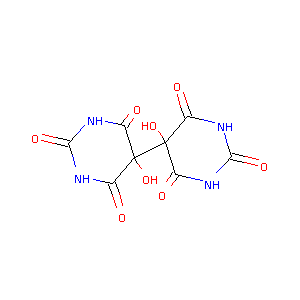

In [29]:
Draw.MolToImage(o1_mol)

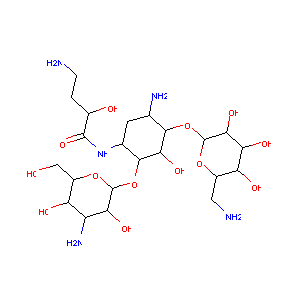

In [30]:
o2_mol=Chem.MolFromSmiles(outlier2)
AllChem.Compute2DCoords(o2_mol)
Draw.MolToImage(o2_mol)